In [2]:
import pyprob
%matplotlib inline
import matplotlib.pyplot as plt
from pyprob import Model
import numpy as np

In [29]:
import math
import pyprob
from pyprob import Model
from pyprob.distributions import Normal

class GaussianUnknownMean(Model):
    def __init__(self):
        super().__init__(name="Gaussian with unknown mean") # give the model a name
        self.prior_mean = 1
        self.prior_std = 4
        self.likelihood_std = 0.5

    def forward(self): # Needed to specifcy how the generative model is run forward
        # sample the (latent) mean variable to be inferred:
        a = pyprob.sample(Normal(self.prior_mean, self.prior_std), name = 'input1') # NOTE: sample -> denotes latent variables
        b = pyprob.sample(Normal(self.prior_mean, self.prior_std), name = 'input2') # NOTE: sample -> denotes latent variables

        mu = a+b

        pyprob.observe(Normal(mu, self.likelihood_std), name='obs0') # NOTE: observe -> denotes observable variables
        return a,b

model = GaussianUnknownMean()

In [30]:
model.learn_inference_network(
    num_traces=10000,
    observe_embeddings={'obs0': {'dim': 32, 'depth': 3}}
)

Creating new inference network...
Observable obs0: observe embedding not specified, using the default FEEDFORWARD.
Observe embedding dimension: 32
Train. time | Epoch| Trace     | Init. loss| Min. loss | Curr. loss| T.since min | Traces/sec
New layers, address: 20__forward__a__Normal__1, distribution: Normal
New layers, address: 44__forward__b__Normal__1, distribution: Normal
Total addresses: 2, parameters: 6,926
0d:00:00:06 | 1    | 10,048    | +5.82e+00 | +4.55e+00 | +5.04e+00 | 0d:00:00:03 | 1,614.0                              


In [42]:
condition  = {'obs0': 2}

prior = model.prior_distribution(
    num_traces=1000,
)
posterior = model.posterior_distribution(
    num_traces=1000,
    inference_engine=pyprob.InferenceEngine.IMPORTANCE_SAMPLING_WITH_INFERENCE_NETWORK,
    observe=condition
)

Time spent  | Time remain.| Progress             | Trace     | Traces/sec
0d:00:00:00 | 0d:00:00:00 | #################### | 1000/1000 | 1,773.47       
Time spent  | Time remain.| Progress             | Trace     | Traces/sec
0d:00:00:03 | 0d:00:00:00 | #################### | 1000/1000 | 284.19       


In [39]:
edges = np.linspace(-10,10, 25)

In [43]:
prior     = np.asarray([[x.item() for x in prior.sample()] for x in range(1000)])
posterior = np.asarray([[x.item() for x in posterior.sample()] for x in range(1000)])

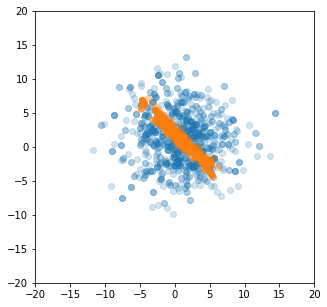

In [44]:
plt.scatter(prior[:,0],prior[:,1], alpha = 0.2)
plt.scatter(posterior[:,0],posterior[:,1], alpha = 0.2)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.gcf().set_size_inches(5,5)